In [6]:
%%capture
!pip install yellowbrick
!pip install mlxtend


🚀 Training Model: Random Forest
📊 Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     28931
           1       0.86      0.81      0.84     11069

    accuracy                           0.91     40000
   macro avg       0.89      0.88      0.89     40000
weighted avg       0.91      0.91      0.91     40000

🧮 Confusion Matrix for Random Forest:
 [[27460  1471]
 [ 2072  8997]]


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' no


🚀 Training Model: XGBoost


/opt/conda/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:52:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     28931
           1       0.87      0.82      0.84     11069

    accuracy                           0.92     40000
   macro avg       0.90      0.89      0.89     40000
weighted avg       0.92      0.92      0.92     40000

🧮 Confusion Matrix for XGBoost:
 [[27613  1318]
 [ 2019  9050]]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo


🚀 Training Model: Logistic Regression


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-seri

📊 Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     28931
           1       0.76      0.68      0.72     11069

    accuracy                           0.85     40000
   macro avg       0.82      0.80      0.81     40000
weighted avg       0.85      0.85      0.85     40000

🧮 Confusion Matrix for Logistic Regression:
 [[26583  2348]
 [ 3498  7571]]


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not fo

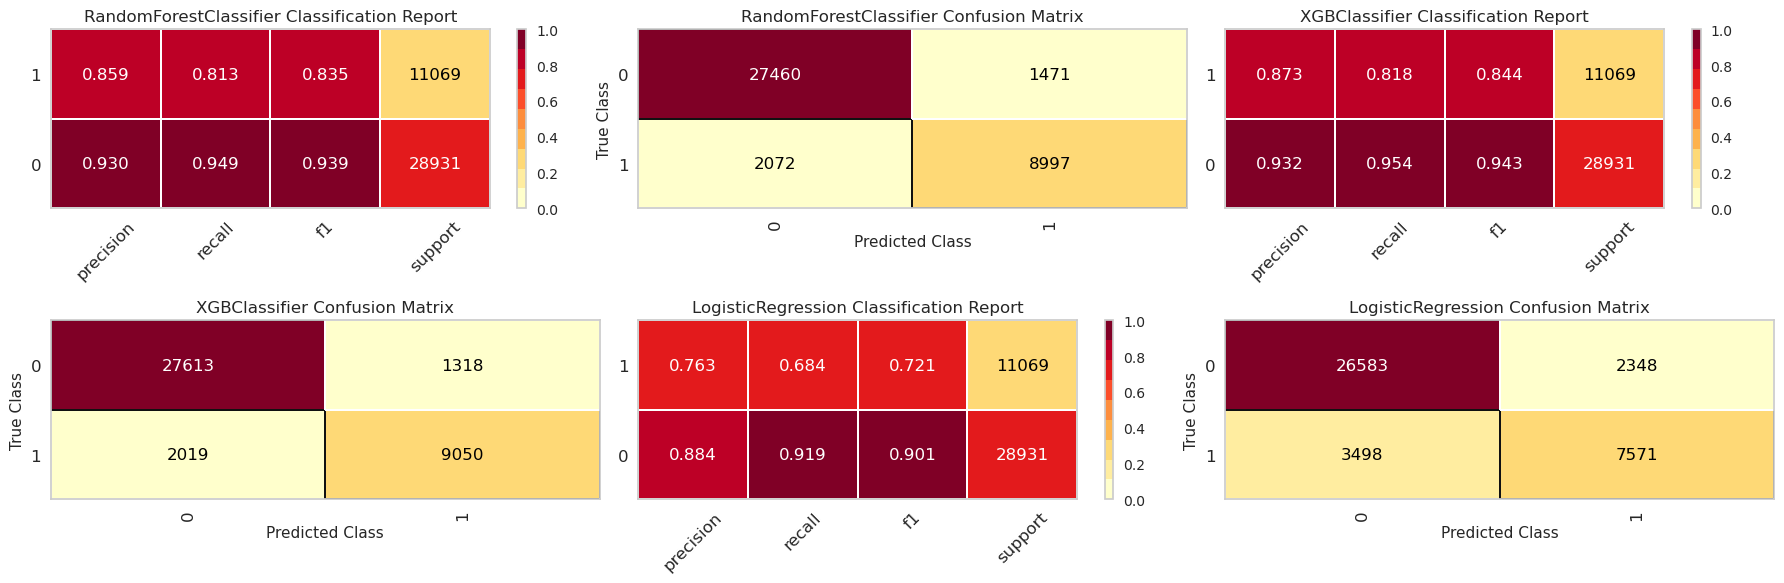


📈 Model Comparison Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
1              XGBoost  0.916575   0.872878  0.817599  0.844335
0        Random Forest  0.911425   0.859476  0.812811  0.835492
2  Logistic Regression  0.853850   0.763283  0.683982  0.721460


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Load processed dataset
df = pd.read_csv("exchange_dataset_enhanced.csv")

# Step 2: Feature selection using SelectKBest (f-classif) for classification tasks
X = df.drop('exchange', axis=1)  # Features
y = df['exchange']  # Target variable

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = []

# Plotting setup
plt.figure(figsize=(18, 6))
i = 1

for name, model in models.items():
    print(f"\n🚀 Training Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy and Report
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f"📊 Classification Report for {name}:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"🧮 Confusion Matrix for {name}:\n", cm)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1-Score": report['1']['f1-score']
    })

    # Plot Classification Report
    plt.subplot(2, 3, i)
    visualizer = ClassificationReport(model, support=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.finalize()
    i += 1

    # Plot Confusion Matrix
    plt.subplot(2, 3, i)
    visualizer = ConfusionMatrix(model, classes=["0", "1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.finalize()
    i += 1

plt.tight_layout()
plt.show()

# Summary DataFrame
results_df = pd.DataFrame(results)
print("\n📈 Model Comparison Summary:")
print(results_df.sort_values(by="F1-Score", ascending=False))
